In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('Credit_Card.csv')

In [3]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [6]:
labels = pd.read_csv('Credit_card_label.csv')

In [7]:
labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [8]:
data = data.merge(labels, how='left',on='Ind_ID')

In [9]:
data.head()  # Display the first few rows of the dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [11]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [12]:
data.isna().sum()  # Check for missing values in the dataset    

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [15]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

In [14]:
data.drop(columns=['Type_Occupation'], inplace=True)  # Drop the 'Type_Occupation' column

In [16]:
data.dropna(inplace=True)  # Drop rows with missing values

In [17]:
data.isna().sum()  # Check for missing values in the dataset

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [18]:
data.duplicated().sum()  # Check for duplicate rows in the dataset

0

In [20]:
gender_income = data.groupby('GENDER')['Annual_income'].mean()

In [21]:
gender_income

GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

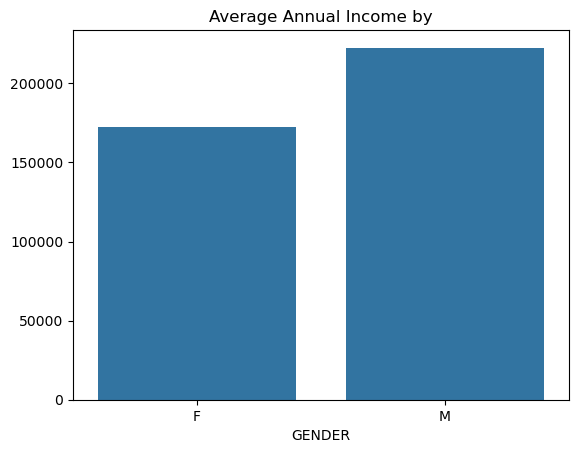

In [22]:
sns.barplot(x=gender_income.index,y=gender_income.values)
plt.title('Average Annual Income by')
plt.show()


In [23]:
labels_count = data['label'].value_counts()

In [24]:
labels_count

label
0    1336
1     160
Name: count, dtype: int64

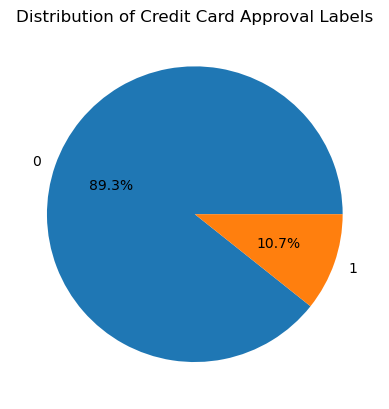

In [25]:
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%')
plt.title('Distribution of Credit Card Approval Labels')
plt.show()

In [26]:
data.groupby('Type_Income')['Annual_income'].mean()

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

In [28]:
data.groupby('Marital_status')['Employed_days'].max()

Marital_status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employed_days, dtype: int64

In [29]:
data.groupby('Housing_type')['Family_Members'].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [31]:
data.groupby('GENDER')['Birthday_count'].min() * -1  # Assuming you want to multiply the minimum birthday count by -1

GENDER
F    24946.0
M    24662.0
Name: Birthday_count, dtype: float64

In [33]:
data.groupby('Propert_Owner')['Annual_income'].mean()  # Calculate the mean annual income by property owner status

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

In [34]:
data.groupby('EDUCATION')['Mobile_phone'].mean()  # Calculate the mean annual income by education level

EDUCATION
Academic degree                  1.0
Higher education                 1.0
Incomplete higher                1.0
Lower secondary                  1.0
Secondary / secondary special    1.0
Name: Mobile_phone, dtype: float64

In [35]:
data.groupby('CHILDREN')['Annual_income'].sum()  # Calculate the sum of family members by number of children

CHILDREN
0     191703172.5
1      64218600.0
2      26226900.0
3       2845800.0
4        180000.0
14       225000.0
Name: Annual_income, dtype: float64

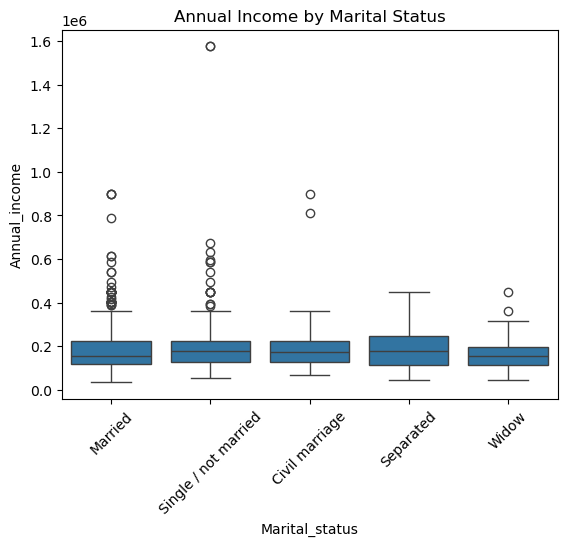

In [36]:
sns.boxplot(x='Marital_status', y='Annual_income', data=data)
plt.title('Annual Income by Marital Status')
plt.xticks(rotation=45)
plt.show()

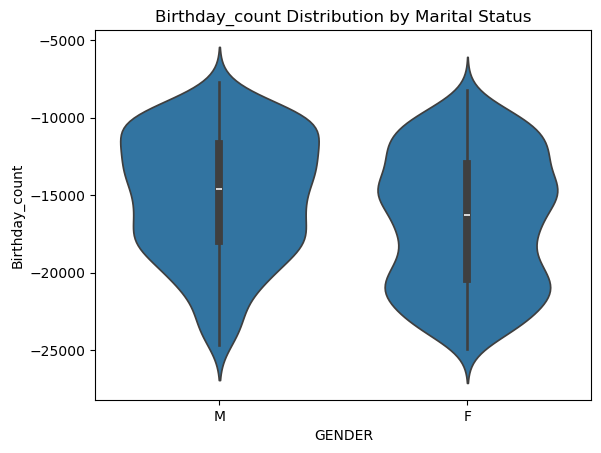

In [39]:
sns.violinplot(x='GENDER', y='Birthday_count', data=data)
plt.title('Birthday_count Distribution by Marital Status')
plt.show()

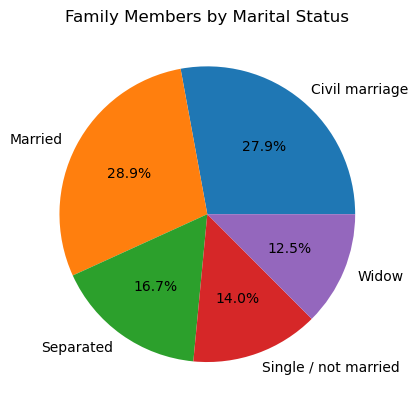

In [42]:
data.groupby('Marital_status')['Family_Members'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Family Members by Marital Status')
plt.ylabel('')
plt.show()

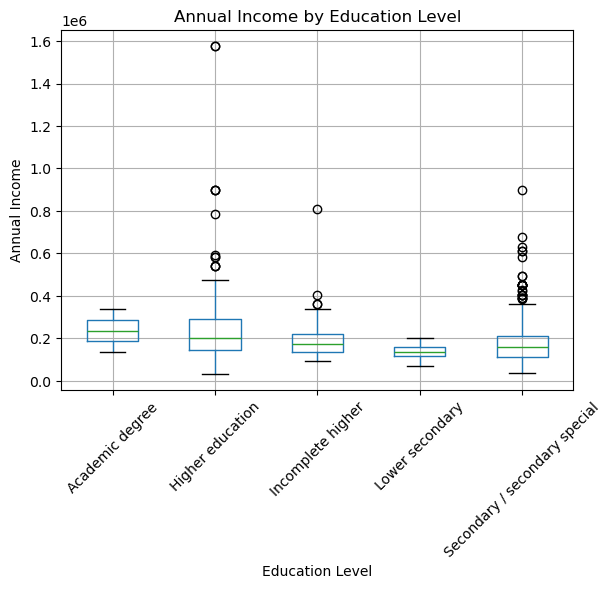

In [43]:
data.boxplot(column='Annual_income', by='EDUCATION',)
plt.title('Annual Income by Education Level')
plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

In [44]:
data.head()  # Display the first few rows of the dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,1


In [45]:
data = data[["Car_Owner","Propert_Owner","Annual_income","EDUCATION","label"]]

In [46]:
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1
6,Y,N,315000.0,Higher education,1
7,N,N,180000.0,Secondary / secondary special,1
...,...,...,...,...,...
1542,Y,N,360000.0,Secondary / secondary special,0
1544,N,N,225000.0,Incomplete higher,0
1545,Y,Y,180000.0,Higher education,0
1546,Y,N,270000.0,Secondary / secondary special,0


In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Car_Owner'] = le.fit_transform(data['Car_Owner'])
data['Propert_Owner'] = le.fit_transform(data['Propert_Owner'])
data['EDUCATION'] = le.fit_transform(data['EDUCATION'])

/var/folders/j5/mx6jf4jj165_kcnf_hhp2cg00000gn/T/ipykernel_3947/3519652994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car_Owner'] = le.fit_transform(data['Car_Owner'])
/var/folders/j5/mx6jf4jj165_kcnf_hhp2cg00000gn/T/ipykernel_3947/3519652994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Propert_Owner'] = le.fit_transform(data['Propert_Owner'])
/var/folders/j5/mx6jf4jj165_kcnf_hhp2cg00000gn/T/ipykernel_3947/3519652994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [48]:
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,1,1,180000.0,1,1
1,1,0,315000.0,1,1
4,1,0,315000.0,1,1
6,1,0,315000.0,1,1
7,0,0,180000.0,4,1
...,...,...,...,...,...
1542,1,0,360000.0,4,0
1544,0,0,225000.0,2,0
1545,1,1,180000.0,1,0
1546,1,0,270000.0,4,0


In [49]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_profmance(prediction):
    print('accuracy_score on model is {}'.format(accuracy_score(y_test, prediction)))
    print('confusion_matrix on model is \n{}'.format(confusion_matrix(y_test, prediction)))
    print('classification_report on model is \n{}'.format(classification_report(y_test, prediction)))


In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [58]:
log_predictions = model.predict(X_test_scaled)
model_profmance(log_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'kd_tree']
}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')    

In [65]:
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
grid_search_knn.best_params_  # Display the best parameters found by GridSearchCV

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 11,
 'weights': 'uniform'}

In [67]:
knn_predictions = grid_search_knn.predict(X_test_scaled)
model_profmance(knn_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svm = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')


In [69]:
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [70]:
grid_search_svm.best_params_  # Display the best parameters found by GridSearchCV

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [71]:
svm_predictions = grid_search_svm.predict(X_test_scaled)
model_profmance(svm_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # 'log_loss' is valid from sklearn 1.1+
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  # 'auto' is not valid for DecisionTreeClassifier
}

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Optional: speeds up computation using all available cores
)



In [75]:
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [76]:
dt_predictions = grid_search_dt.predict(X_test_scaled)
model_profmance(dt_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
n_estimators = [50, 100, 200]  # Example values for n_estimators
max_depth = [None, 10, 20, 30]  # Example values for max_depth
bootstrap = [True, False]  # Example values for bootstrap
obb_score = ['gini', 'entropy']  # Example values for criterion
param_grid_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'bootstrap': bootstrap,
    'criterion': obb_score
}
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Optional: speeds up computation using all available cores
)


In [78]:
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [79]:
grid_search_rf.best_params_  # Display the best parameters found by GridSearchCV

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [80]:
rf_predictions = grid_search_rf.predict(X_test_scaled)
model_profmance(rf_predictions)

accuracy_score on model is 0.8933333333333333
confusion_matrix on model is 
[[266   6]
 [ 26   2]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       272
           1       0.25      0.07      0.11        28

    accuracy                           0.89       300
   macro avg       0.58      0.52      0.53       300
weighted avg       0.85      0.89      0.87       300



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Initialize AdaBoost classifier (uses DecisionTreeClassifier(max_depth=1) by default)
ada = AdaBoostClassifier()

# Define the parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Set up the grid search with cross-validation
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)


 


In [84]:
grid_search_ada.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [86]:
best_model = grid_search_ada.best_estimator_
best_params = grid_search_ada.best_params_
best_score = grid_search_ada.best_score_

In [87]:
best_model

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01)

In [88]:
best_params

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}

In [89]:
best_score

0.8896338912133892

In [90]:
ada_predictions = grid_search_ada.predict(X_test_scaled)
model_profmance(ada_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)


In [92]:
grid_search_xgb.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:27:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:27:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:27:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:27:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [93]:
grid_search_xgb.best_params_  # Display the best parameters found by GridSearchCV

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [94]:
xgb_predictions = grid_search_xgb.predict(X_test_scaled)
model_profmance(xgb_predictions)

accuracy_score on model is 0.9066666666666666
confusion_matrix on model is 
[[272   0]
 [ 28   0]]
classification_report on model is 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
